### Mini-Project 3: CO₂ Exposure & Cognitive Risk Tracker
You're monitoring daily CO₂ levels for astronauts aboard a spacecraft.
High CO₂ concentrations can impair cognition, attention, and decision-making — especially in enclosed environments like ISS or Mars transit vehicles. Your tasks:
- Read daily CO₂ exposure data per crew member
- Flag any day where **CO₂ > 1000 ppm (mild risk)**, and especially **> 2500 ppm (performance risk)**
- Count & summarize how many risky days each crew member had
- Plot CO₂ trends or cumulative exposure

In [1]:
import pandas as pd

In [50]:
co2_log = pd.read_csv('./data/co2_log.csv')

In [51]:
co2_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         42 non-null     object
 1   crew_member  42 non-null     object
 2   co2_ppm      42 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [52]:
co2_log.head()

,date,crew_member,co2_ppm
0,2025-03-20,Alice Carter,1035
1,2025-03-20,Ben O'Hara,1200
2,2025-03-20,Jonas Müller,3082
3,2025-03-21,Alice Carter,3086
4,2025-03-21,Ben O'Hara,1297


In [5]:
co2_log_crew = co2_log.sort_values(by=['crew_member', 'date'])

In [6]:
co2_log_crew.head()

,date,crew_member,co2_ppm
0,2025-03-20,Alice Carter,1035
3,2025-03-21,Alice Carter,3086
6,2025-03-22,Alice Carter,2630
9,2025-03-23,Alice Carter,1269
12,2025-03-24,Alice Carter,988


In [7]:
status = []
for index, row in co2_log_crew.iterrows():
    co2 = row['co2_ppm']
    if co2 > 2500:
        co2_status= 'Performance issue' 
    elif co2 >1000: 
        co2_status='Mild risk' 
    else:
        co2_status= 'OK'
    status.append(co2_status)

In [8]:
co2_log_crew['status'] = status
co2_log_crew.head()

,date,crew_member,co2_ppm,status
0,2025-03-20,Alice Carter,1035,Mild risk
3,2025-03-21,Alice Carter,3086,Performance issue
6,2025-03-22,Alice Carter,2630,Performance issue
9,2025-03-23,Alice Carter,1269,Mild risk
12,2025-03-24,Alice Carter,988,OK


In [9]:
for index, row in co2_log_crew.iterrows():
    if row['status'] == 'Performance issue' or row['status'] == 'Mild risk':
        print(f"{row['crew_member']}: {row['status']} on {row['date']} | CO2 level: {row['co2_ppm']}")

Alice Carter: Mild risk on 2025-03-20 | CO2 level: 1035
Alice Carter: Performance issue on 2025-03-21 | CO2 level: 3086
Alice Carter: Performance issue on 2025-03-22 | CO2 level: 2630
Alice Carter: Mild risk on 2025-03-23 | CO2 level: 1269
Alice Carter: Mild risk on 2025-03-25 | CO2 level: 1837
Alice Carter: Performance issue on 2025-03-27 | CO2 level: 3041
Alice Carter: Mild risk on 2025-03-30 | CO2 level: 1360
Alice Carter: Mild risk on 2025-03-31 | CO2 level: 1731
Alice Carter: Mild risk on 2025-04-01 | CO2 level: 1813
Alice Carter: Mild risk on 2025-04-02 | CO2 level: 1759
Ben O'Hara: Mild risk on 2025-03-20 | CO2 level: 1200
Ben O'Hara: Mild risk on 2025-03-21 | CO2 level: 1297
Ben O'Hara: Mild risk on 2025-03-22 | CO2 level: 1323
Ben O'Hara: Mild risk on 2025-03-24 | CO2 level: 1239
Ben O'Hara: Mild risk on 2025-03-26 | CO2 level: 1360
Ben O'Hara: Mild risk on 2025-03-27 | CO2 level: 1114
Ben O'Hara: Mild risk on 2025-03-28 | CO2 level: 2100
Ben O'Hara: Performance issue on 2025-

In [10]:
results = []

for index, row in co2_log_crew.iterrows():
    if row['status'] == 'Performance issue' or row['status'] == 'Mild risk':
        results.append({
            'crew_member': row['crew_member'],
            'date': row['date'],
            'status': row['status'],
            'co2_ppm': row['co2_ppm']
        })

# Convert to dataFrame
co2_alert = pd.DataFrame(results)

In [11]:
co2_alert.head()

,crew_member,date,status,co2_ppm
0,Alice Carter,2025-03-20,Mild risk,1035
1,Alice Carter,2025-03-21,Performance issue,3086
2,Alice Carter,2025-03-22,Performance issue,2630
3,Alice Carter,2025-03-23,Mild risk,1269
4,Alice Carter,2025-03-25,Mild risk,1837


In [12]:
def alert(name):
    filter_crew = co2_alert[(co2_alert['crew_member'] == name)]
    count = {}
    for index, row in filter_crew.iterrows():
        if row['status'] not in count:
            count[row['status']] = 1
        else:
            count[row['status']] += 1
    print(f"Total risky days:")
    print(count)

In [13]:
crew_names = co2_alert['crew_member'].unique()

In [14]:
for name in crew_names:
    print(f"\n--- Checking for {name} ---")
    alert(name)


--- Checking for Alice Carter ---
Total risky days:
{'Mild risk': 7, 'Performance issue': 3}

--- Checking for Ben O'Hara ---
Total risky days:
{'Mild risk': 9, 'Performance issue': 3}

--- Checking for Jonas Müller ---
Total risky days:
{'Performance issue': 5, 'Mild risk': 7}


--THE END--

In [15]:
import matplotlib.pyplot as plt

In [49]:
crew_names = co2_log['crew_member'].unique()
crew_names.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
def plotting(name):
    filter_crew = co2_alert[(co2_alert['crew_member'] == name)]
    for index, row in filter_crew.iterrows():
        date = filter_crew['date']
        crew = filter_crew['crew_member']
        co2_level = filter_crew['co2_ppm']

        #create the plot
        plt.figure(figsize=(12, 6))
        plt.plot(date, co2_level, label = crew)
        plt.legend()
        plt.show()
        
        

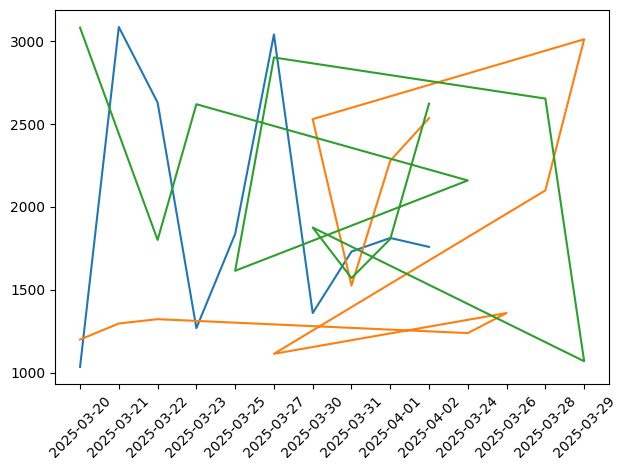

In [46]:
for name in co2_alert['crew_member'].unique():
    individual = co2_alert[co2_alert['crew_member'] == name]
    plt.plot(individual['date'], individual['co2_ppm'], label = name)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

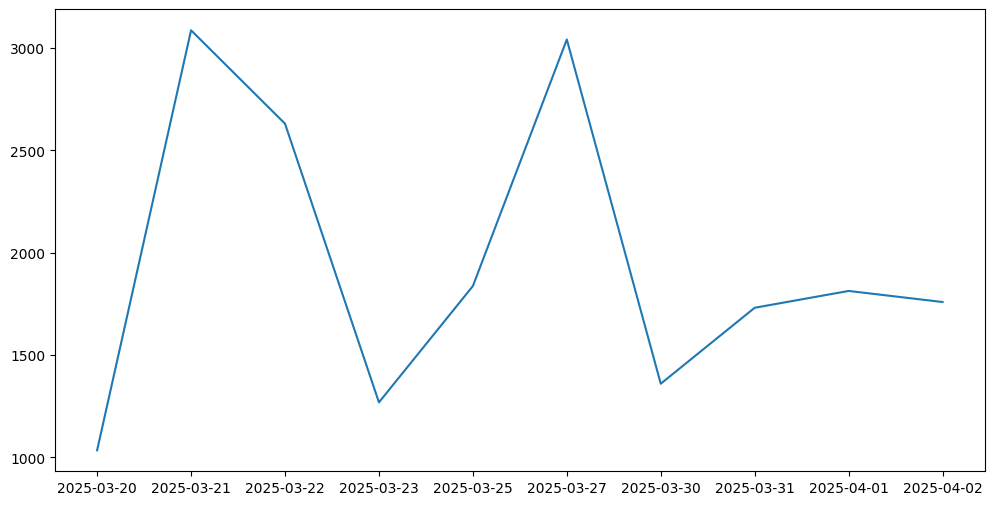

In [27]:
filter_crew = co2_alert[(co2_alert['crew_member'] == name)]

date = filter_crew['date']
crew = filter_crew['crew_member']
co2_level = filter_crew['co2_ppm']

#create the plot
plt.figure(figsize=(12, 6))
plt.plot(date, co2_level, label = "ss")
plt.show()

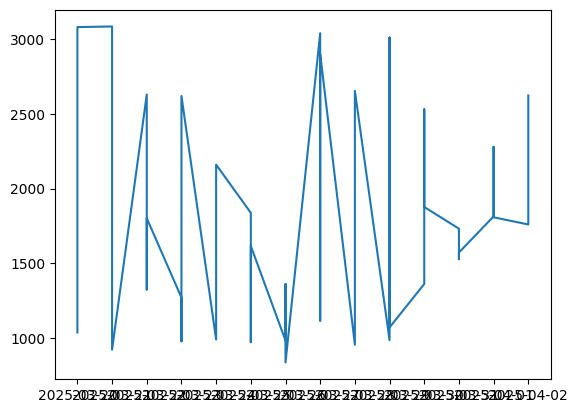

In [24]:
date = co2_log['date']
crew = co2_log['crew_member']
co2_level = co2_log['co2_ppm']

#create the plot
plt.plot(date, co2_level, label = "ss")
plt.show()